**Neural Network**

/Users/emilybirch/CEGE0004


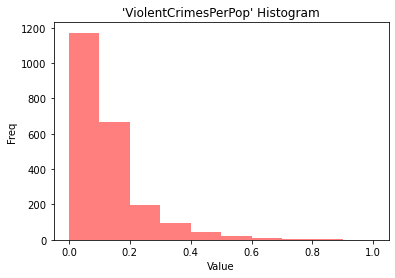

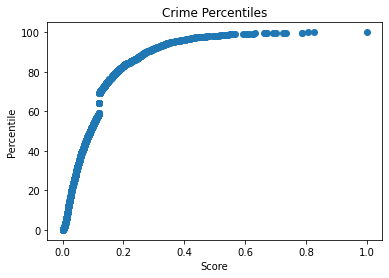

(1881, 100)


Using TensorFlow backend.
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

[[ 0.1709585   0.86115875 -0.69514359 ...  0.65091754 -0.65825201
  -1.60502361]
 [ 0.5682599   0.66156113 -0.14248086 ...  0.35222533  0.38228698
   0.65860842]
 [-0.19412927 -0.39406151 -0.1774193  ... -0.10631744 -1.14383688
  -1.60502361]
 ...
 [-0.99368801 -1.04745553  0.46100144 ...  0.14396288  0.65976405
  -1.60502361]
 [ 0.81275307  0.58997293 -0.74278693 ... -2.06836901 -0.38077495
   0.66701496]
 [-0.93256471  0.61909356  0.24184208 ...  1.01537684 -0.31140568
  -1.60502361]]


In [1]:
# run preprocessing
%pwd  
%cd /Users/emilybirch/CEGE0004
%run alt_Preprocessing.ipynb


#import the required pacakages
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score



# Split the data into training and test data sets using sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)


# transform x features
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)


sc = StandardScaler()
sc.fit(x_test)
X_test_transf = sc.transform(x_test)


# check that the data is transformed such that its distribution will have a mean value 0 and standard deviation of 1.
print(X_train)

In [6]:
# check the data
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1881, 100) (333, 100) (1881,) (333,)


**Results of grid search (GridSearchCV()) to tune hyperparameters found:**

1. The optimizer providing the best model accuracy is 'Adagrad'.
2. The optimal learning rate and momentum are: is 'learn_rate': 0.3 and 'momentum': 0.0 (when using stochastic gradient descent).
3. Use epochs=50 and batch size=5 to find the minima more quickly, reducing computational running time. Plus to allow the model to not learn patterns. 
4. Use a dropout rate for regularisation of 0.7 and a maxnorm 3 kernel weight constraint, to improve the model's ability to generalise.
5. Set the number of neurons to between 1-15 (had the highest accuracy scores) to control the representational capacity of the NN. 

In [2]:
# function to create model, required for KerasClassifier
def create_model(optimizer='Adagrad', init='glorot_uniform', neurons=12, dropout_rate=0.2):
    # create model
    model = Sequential()
    # adding more layers by trial and error
    model.add(Dense(neurons, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid')) 
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [3]:
# get cross validation score  
# Use k fold splits= 11, this achieves maximum accuracy (determined from the loop below)
kfold = StratifiedKFold(n_splits=11, shuffle=True)
classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)
accuracies = cross_val_score(classifier, X_train, y_train, cv= kfold)
print("Smaller: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))



# This code was used to plot the k-fold-accuracy average scores at different k folds
# the result found that k=11 is the optimum
# the loop is too computationally slow to keep in the final code 


# kfold_scores = {}
# for i in range(2,12):
 #   kfold = StratifiedKFold(n_splits=10, shuffle=True)
  #  classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)
  #  accuracies = cross_val_score(classifier, X_train, y_train, cv= kfold)
  #  res = {str(i): accuracies.mean()}
    # kfold_scores.update(res)

# for key in kfold_scores:
 #   plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

# plt.title('K-Fold vs Test Data Accuracy')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# plt.ylim(0.7, 0.9)
# plt.show()

# print("Smaller: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Smaller: 85.01% (1.85%)


**Model classification scores on train data:**

**Accuracy**: 85.01%

**Standard Deviation**: 1.85%

In [4]:
# fit the model on the train data
train_pred = classifier.fit(X_train, y_train)

# use the classifier to predict y (high or low crime)
y_pred = classifier.predict(X_test_transf)
y_pred = (y_pred > 0.5)

# output a classification report inlcuding model classification accuracy and precision 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       220
         1.0       0.84      0.67      0.75       113

    accuracy                           0.85       333
   macro avg       0.85      0.80      0.82       333
weighted avg       0.85      0.85      0.84       333



**Model classification scores on test data:**

**Accuracy**: 0.85

**Precision**: 0.84-0.85

Test Confusion matrix


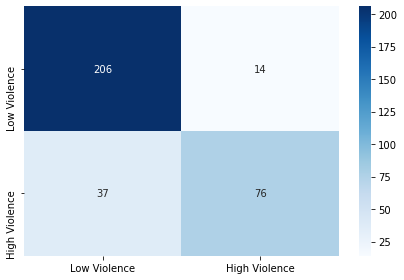

In [5]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

classes = ['Low Violence', 'High Violence']
def plot_confusionmatrix(train_pred, train, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(train_pred,train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    
    
plot_confusionmatrix(y_test, y_pred,dom='Test')

****Extra code showing how grid search for hyperparameter tuning was carried out**

Using the GridSearchCV() class from scikit learn to find the hyperparameters that give the best model accuracy.


1. to find the best optimizer 
2. to tune learning rate and momentum
3. to tune the number of neurons 
4. to tune dropout regularisation
5. to tune the number of epochs and batch size

In [ ]:
# grid search tuning to find best optimizer

# def create_model(optimizer='adam', init='glorot_uniform'):
    # create model
  #  model = Sequential()
    # adding more layers by trial and error
  #  model.add(Dense(30, input_dim=100, kernel_initializer=init, activation='relu'))
  #  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
   # print(model.summary())
    # Compile model
  #  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  #  return model


# create model
# model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.852206 using {'optimizer': 'Adagrad'}

In [ ]:
# grid search to tune learning rate and momentum

# create the model again and set these 
# from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
# def create_model(learn_rate=0.01, momentum=0):
    # create model
   # model = Sequential()
  #  model.add(Dense(12, input_dim=100, activation='relu'))
  #  model.add(Dense(1, activation='sigmoid'))
    # Compile model
  #  optimizer = SGD(lr=learn_rate, momentum=momentum)
  #  model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  #  return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# param_grid = dict(learn_rate=learn_rate, momentum=momentum)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.858054 using {'learn_rate': 0.3, 'momentum': 0.0}

In [ ]:
# gridsearch to tune the number of neurons

# from keras.layers import Dropout
# from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
# def create_model(neurons=1):
    # create model
  #  model = Sequential()
  #  model.add(Dense(neurons, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
  #  model.add(Dropout(0.2))
  #  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
  #  model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  #  return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.850611 using {'neurons': 1}

highest accuracy scores between 1-15 neurons.

In [ ]:
# grid search to tune dropout regularisation rate

# from keras.layers import Dropout
# from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
# def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
   # model = Sequential()
   # model.add(Dense(12, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
   # model.add(Dropout(dropout_rate))
   # model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   # return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))


output: Best: 0.850611 using {'dropout_rate': 0.7, 'weight_constraint': 3}

higher weight constraints (3-5) with dropout rates of 0.6-0.8 gave the best accuracy scores.

In [ ]:
# to tune the epochs and batch size
# too computationally slow to run

# from sklearn.model_selection import GridSearchCV
# optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
# epochs = [50, 100, 150]
# batches = [5, 10, 20]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid_result = grid.fit(X, Y)
# summarize results of grid search for best epoch, batch and optimizer
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))